<a href="https://colab.research.google.com/github/Kandrels/Taller01-MineriaDeDatos2022s2/blob/main/Mineria_de_Datos_Taller_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER 01: MINERIA DE DATOS
# PRE - PROCESSING

---



> Mineria de Datos- Seccion 412 - UTEM - 2S 2022

  Estudiantes:

     Kevin Andres Labra Soto [18.355.485-9] Kevin.labras@utem.cl
     German Ramirez Obaid [18.934.585-2] german.ramirezo@utem.cl









## INTRODUCCION
En el presente reporte se esclarecen preguntas y conclusiones acerca de el pre-procesamiento y estudio en el campo de la Mineria de Datos , segun se dicta en el curso bajo el mismo nombre.
  Tras distintas instancias academicas se ha logrado inferir que el estudios de los datos o EDA es una etapa que debe ser considerada critica dentro de la ciencia de los datos y que sin duda es una de las que mas consume tiempo a la hora de dedicarse a ella como disciplina.

Siguiendo los pasos guias propuestos de Almudena Bonaplata [[1]](https://www.kaggle.com/code/abonaplata/analisis-exploratorio-de-datos-con-python), quien a su ves siguio a otros estudiosos del tema que conllevan a un capítulo en particular de 'Examining your data' de Hair et al. (2013), esque como ya se expuso con anterioridad se hara un completo analisis del conjunto de datos o dataset de **Licencias Medicas Segundo Trimestre 2022 SuperIntendencia de Salud** , entregado particularmente para su estudio y analisis.

El análisis se podria desmenuzar en los siguientes apartados:

Comprender el problema

Estudio univariable

Estudio multivariable

Limpieza básica de los datos

Comprobación de suposiciones


In [22]:
#importamos pandas,otras librerias importantes y montamos nuestro drive para usar el dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#hacemos lectura del dataframe con un delimitador "|" para separar datos entre columnas
data = pd.read_csv('/content/drive/MyDrive/Licencias_Medicas_2022t2.txt',sep="|",header=None)
#se modifica el default de columnas a mostrar por el maximo que tenga el dataframe recibido
pd.options.display.max_columns = None
#se imprime el dataframe para un rapido analisis y primera vista como tal
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,107,2022t2,47878798,2022t2,84,2022t2,26-30,Femenino,Servicios,Profesor,Licencia Maternal,Reposo Total,3004969,Medico,Licencia Maternal,84,NaN,Autoricese,Continuacion,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,84,2406186,467710,2022t2,SI,2021,249791,NaN,2011057352,Su Domicilio,Z. Sin Clasificar,187,2019t1,2019t1,859352.0,261926630.0,1800.0,NaN
1,67,2022t2,3078522,2022t2,7,2022t2,36-40,Femenino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,769949,Medico,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,7,200239,34619,2022t2,SI,1800,43103,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2013t1,2013t1,858167.0,261926630.0,1800.0,NaN
2,107,2022t2,40458254,2022t2,7,2022t2,31-35,Masculino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,769949,Medico,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,7,145716,16878,1800t1,SI,1800,27583,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2017t1,2017t1,1092870.0,261926630.0,1800.0,NaN
3,107,2022t2,2979082,2022t1,5,2022t1,41-45,Femenino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,262070233,Medico,Enf. o Acc. no del Trabajo,5,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t1,13,Trab. Dep. Sector Privado,Isapre,5,82889,14820,2022t2,SI,1800,17391,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2020t1,2020t1,1243330.0,261926630.0,1800.0,NaN
4,107,2022t2,2081595,2022t2,15,2022t2,31-35,Femenino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,2010807355,Medico,Enf. o Acc. no del Trabajo,15,F00-F99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,15,375447,82552,1800t1,SI,1800,63917,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2013t1,2013t1,750894.0,261926630.0,1800.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74187,107,2022t2,5887482,2022t2,11,2022t2,36-40,Masculino,Otros,Otros,Enf. o Acc. no del Trabajo,Reposo Total,20765797,Medico,Enf. o Acc. no del Trabajo,11,K00-K93,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,11,756410,83164,1800t1,SI,1800,102841,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2018t4,2018t4,2062937.0,6596829.0,1800.0,NaN
74188,107,2022t2,3092371,2022t2,30,2022t2,31-35,Masculino,Otros,Otros,Enf. o Acc. no del Trabajo,Reposo Total,2998116,Medico,Enf. o Acc. no del Trabajo,0,M00-M99,Rechacese,Continuacion,Reposo Total,Sin Derecho,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,0,0,0,1800t1,SI,1800,0,NaN,1529982,Z. Sin Clasificar,Reposo Injustificado,180,2021t3,2021t3,0.0,6596829.0,1800.0,NaN
74189,107,2022t2,3092371,2022t2,30,2022t2,31-35,Masculino,Otros,Otros,Enf. o Acc. no del Trabajo,Reposo Total,2998116,Medico,Enf. o Acc. no del Trabajo,15,M00-M99,Reducese,Continuacion,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,15,353381,59060,2022t2,SI,1800,56740,NaN,1529982,Z. Sin Clasificar,Reposo Injustificado,150,2021t3,2021t3,706762.0,6596829.0,1800.0,NaN
74190,107,2022t2,3092371,2022t2,30,2022t2,31-35,Masculino,Otros,Otros,Enf. o Acc. no del Trabajo,Reposo Total,2998116,Medico,Enf. o Acc. no del Trabajo,0,M00-M99,Rechacese,Continuacion,Reposo Total,Sin Derecho,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,0,0,0,1800t1,SI,1800,0,NaN,1529982,Su Domicilio,Reposo Injustificado,120,2021t3,2021t3,0.0,6596829.0,1800.0,NaN


## EL PROBLEMA
Posterior a la lectura del archivo dentro de nuestro book es que notamos claramente con una baja dificultad de que el dataframe como tal aun no es legible facilmente para el usuario sin el manejo de su diccionario en particular por separado, esto debido a que el dataset no contiene el nombre/clasificacion de cada columna dentro de el mismo como tal.
  Con el fin de entender la problematica y el conjunto de datos con holgura es que se definen los siguientes puntos dentro del proyecto:


1.   La correcta distribucion y presentacion del dataframe , amigable al lector
2.   La relevancia de las variables en la revision de casos de licencias medicas
3.   La importancia de las variables
4.   Solapamiento o competencia con otras variables



---


## Diccionario de datos

Sabemos per se , que las columnas o categorias pueden ser descritas como las siguientes en el mismo orden que hemos visto arriba

`'CÓDIGO ISAPRE','FECHA INFORMACIÓN','RUN TRABAJADOR','FECHA EMISIÓN LICENCIA','NÚMERO DE DÍAS','FECHA INICIO REPOSO','EDAD TRABAJADOR','SEXO TRABAJADOR','ACTIVIDAD LABORAL','OCUPACIÓN','TIPO DE LICENCIA','CARACTERÍSTICAS DEL REPOSO','RUN PROFESIONAL','TIPO PROFESIONAL','TIPO DE LICENCIA SEGÚN CONTRALORÍA', 'NÚMERO DE DÍAS AUTORIZADOS','DIAGNÓSTICO PRINCIPAL','TIPO DE RESOLUCIÓN','PERIODO','REPOSO AUTORIZADO','DERECHO A SUBSIDIO','FECHA RECEPCIÓN ISAPRE','FECHA RESOLUCIÓN ISAPRE','FECHA RECEPCIÓN EMPLEADOR','REGIÓN','CALIDAD TRABAJADOR','ENTIDAD PAGADORA','NÚMERO DÍAS A PAGAR','MONTO SUBSIDIO LÍQUIDO','MONTO APORTE PREVISIONAL ISAPRE','FECHA DE INICIO DE PAGO','RECUPERABILIDAD','FECHA DE CONCEPCIÓN','MONTO APORTE PREVISIONAL DE PENSIONES','OTROS DIAGNÓSTICOS','RUN IDENTIFICACIÓN DEL HIJO','LUGAR DE REPOSO','CAUSA RECHAZO O MODIFICACIÓN','NÚMERO DE DÍAS PREVIOS AUTORIZADOS','FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL','FECHA CONTRATO DE TRABAJO','MONTO BASE CÁLCULO SUBSIDIOS','RUT EMPLEADOR','FECHA NACIMIENTO HIJO','final_row'`

de donde podemos notar los siguientes cambios comentados en cada linea de codigo correspondiente con el fin de hacer el trabajo y su exposicion un poco mas expedito











In [10]:

#creamos un nuevo dataframe donde copiamos el original para no modificarlo durante el estudio 
data2 = data.copy()
#añadimos nombre a las columnas del dataframe
data2.columns = ['CÓDIGO ISAPRE','FECHA INFORMACIÓN','RUN TRABAJADOR','FECHA EMISIÓN LICENCIA','NÚMERO DE DÍAS','FECHA INICIO REPOSO','EDAD TRABAJADOR','SEXO TRABAJADOR','ACTIVIDAD LABORAL','OCUPACIÓN','TIPO DE LICENCIA','CARACTERÍSTICAS DEL REPOSO','RUN PROFESIONAL','TIPO PROFESIONAL','TIPO DE LICENCIA SEGÚN CONTRALORÍA', 'NÚMERO DE DÍAS AUTORIZADOS','DIAGNÓSTICO PRINCIPAL','TIPO DE RESOLUCIÓN','PERIODO','REPOSO AUTORIZADO','DERECHO A SUBSIDIO','FECHA RECEPCIÓN ISAPRE','FECHA RESOLUCIÓN ISAPRE','FECHA RECEPCIÓN EMPLEADOR','REGIÓN','CALIDAD TRABAJADOR','ENTIDAD PAGADORA','NÚMERO DÍAS A PAGAR','MONTO SUBSIDIO LÍQUIDO','MONTO APORTE PREVISIONAL ISAPRE','FECHA DE INICIO DE PAGO','RECUPERABILIDAD','FECHA DE CONCEPCIÓN','MONTO APORTE PREVISIONAL DE PENSIONES','OTROS DIAGNÓSTICOS','RUN IDENTIFICACIÓN DEL HIJO','LUGAR DE REPOSO','CAUSA RECHAZO O MODIFICACIÓN','NÚMERO DE DÍAS PREVIOS AUTORIZADOS','FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL','FECHA CONTRATO DE TRABAJO','MONTO BASE CÁLCULO SUBSIDIOS','RUT EMPLEADOR','FECHA NACIMIENTO HIJO','final_row']



---


## PRE-PROCESAMIENTO

In [11]:
#mostramos por pantalla el dataframe completo con todas sus columnas y heads()+tails() como muestra de datos tangibles
data2

,CÓDIGO ISAPRE,FECHA INFORMACIÓN,RUN TRABAJADOR,FECHA EMISIÓN LICENCIA,NÚMERO DE DÍAS,FECHA INICIO REPOSO,EDAD TRABAJADOR,SEXO TRABAJADOR,ACTIVIDAD LABORAL,OCUPACIÓN,TIPO DE LICENCIA,CARACTERÍSTICAS DEL REPOSO,RUN PROFESIONAL,TIPO PROFESIONAL,TIPO DE LICENCIA SEGÚN CONTRALORÍA,NÚMERO DE DÍAS AUTORIZADOS,DIAGNÓSTICO PRINCIPAL,TIPO DE RESOLUCIÓN,PERIODO,REPOSO AUTORIZADO,DERECHO A SUBSIDIO,FECHA RECEPCIÓN ISAPRE,FECHA RESOLUCIÓN ISAPRE,FECHA RECEPCIÓN EMPLEADOR,REGIÓN,CALIDAD TRABAJADOR,ENTIDAD PAGADORA,NÚMERO DÍAS A PAGAR,MONTO SUBSIDIO LÍQUIDO,MONTO APORTE PREVISIONAL ISAPRE,FECHA DE INICIO DE PAGO,RECUPERABILIDAD,FECHA DE CONCEPCIÓN,MONTO APORTE PREVISIONAL DE PENSIONES,OTROS DIAGNÓSTICOS,RUN IDENTIFICACIÓN DEL HIJO,LUGAR DE REPOSO,CAUSA RECHAZO O MODIFICACIÓN,NÚMERO DE DÍAS PREVIOS AUTORIZADOS,FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL,FECHA CONTRATO DE TRABAJO,MONTO BASE CÁLCULO SUBSIDIOS,RUT EMPLEADOR,FECHA NACIMIENTO HIJO,final_row
0,107,2022t2,47878798,2022t2,84,2022t2,26-30,Femenino,Servicios,Profesor,Licencia Maternal,Reposo Total,3004969,Medico,Licencia Maternal,84,NaN,Autoricese,Continuacion,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,84,2406186,467710,2022t2,SI,2021,249791,NaN,2011057352,Su Domicilio,Z. Sin Clasificar,187,2019t1,2019t1,859352.0,261926630.0,1800.0,NaN
1,67,2022t2,3078522,2022t2,7,2022t2,36-40,Femenino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,769949,Medico,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,7,200239,34619,2022t2,SI,1800,43103,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2013t1,2013t1,858167.0,261926630.0,1800.0,NaN
2,107,2022t2,40458254,2022t2,7,2022t2,31-35,Masculino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,769949,Medico,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,7,145716,16878,1800t1,SI,1800,27583,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2017t1,2017t1,1092870.0,261926630.0,1800.0,NaN
3,107,2022t2,2979082,2022t1,5,2022t1,41-45,Femenino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,262070233,Medico,Enf. o Acc. no del Trabajo,5,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t1,13,Trab. Dep. Sector Privado,Isapre,5,82889,14820,2022t2,SI,1800,17391,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2020t1,2020t1,1243330.0,261926630.0,1800.0,NaN
4,107,2022t2,2081595,2022t2,15,2022t2,31-35,Femenino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,2010807355,Medico,Enf. o Acc. no del Trabajo,15,F00-F99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,15,375447,82552,1800t1,SI,1800,63917,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2013t1,2013t1,750894.0,261926630.0,1800.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74187,107,2022t2,5887482,2022t2,11,2022t2,36-40,Masculino,Otros,Otros,Enf. o Acc. no del Trabajo,Reposo Total,20765797,Medico,Enf. o Acc. no del Trabajo,11,K00-K93,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,11,756410,83164,1800t1,SI,1800,102841,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2018t4,2018t4,2062937.0,6596829.0,1800.0,NaN
74188,107,2022t2,3092371,2022t2,30,2022t2,31-35,Masculino,Otros,Otros,Enf. o Acc. no del Trabajo,Reposo Total,2998116,Medico,Enf. o Acc. no del Trabajo,0,M00-M99,Rechacese,Continuacion,Reposo Total,Sin Derecho,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,0,0,0,1800t1,SI,1800,0,NaN,1529982,Z. Sin Clasificar,Reposo Injustificado,180,2021t3,2021t3,0.0,6596829.0,1800.0,NaN
74189,107,2022t2,3

In [12]:
# Revisamos si existe alguna columna que contenga datos nulos , entre ellos destacamos [45]"final_row" y [34]"otros diagnosticos"
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74192 entries, 0 to 74191
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   CÓDIGO ISAPRE                                 74192 non-null  int64  
 1   FECHA INFORMACIÓN                             74192 non-null  object 
 2   RUN TRABAJADOR                                74192 non-null  int64  
 3   FECHA EMISIÓN LICENCIA                        74192 non-null  object 
 4   NÚMERO DE DÍAS                                74192 non-null  int64  
 5   FECHA INICIO REPOSO                           74192 non-null  object 
 6   EDAD TRABAJADOR                               74192 non-null  object 
 7   SEXO TRABAJADOR                               74192 non-null  object 
 8   ACTIVIDAD LABORAL                             74192 non-null  object 
 9   OCUPACIÓN                                     74192 non-null 

In [14]:
#Mostramos estas variables cada una de forma independiente a la otra con fines de optimizar tiempo 
data2['final_row'].describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: final_row, dtype: float64

In [17]:
data2['OTROS DIAGNÓSTICOS'].describe()

count        1067
unique         22
top       F00-F99
freq          248
Name: OTROS DIAGNÓSTICOS, dtype: object

In [18]:
# Elimino la columna [45]"final_row" ya que podemos asumir que su existencia es con el unico fin de usarla como final de documento y [34]"otros diagnosticos" por considerar informacion no relevante ni precisa para el estudio general esperado
data2 = data2.drop(columns=["OTROS DIAGNÓSTICOS","final_row"])

In [19]:
# Mostramos la info actual para comprobar que ya no se encuentren dichas categorias
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74192 entries, 0 to 74191
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   CÓDIGO ISAPRE                                 74192 non-null  int64  
 1   FECHA INFORMACIÓN                             74192 non-null  object 
 2   RUN TRABAJADOR                                74192 non-null  int64  
 3   FECHA EMISIÓN LICENCIA                        74192 non-null  object 
 4   NÚMERO DE DÍAS                                74192 non-null  int64  
 5   FECHA INICIO REPOSO                           74192 non-null  object 
 6   EDAD TRABAJADOR                               74192 non-null  object 
 7   SEXO TRABAJADOR                               74192 non-null  object 
 8   ACTIVIDAD LABORAL                             74192 non-null  object 
 9   OCUPACIÓN                                     74192 non-null 



---


Raudamente tambien podemos aseverar lo siguiente respecto a las variables remanentes:

  

1.   Con el proposito particular que tomara esta investigacion de aqui en adelante se seguiran las siguientes desiciones que se explicaran con posterioridad en este documento, bajo las razones que se suciten:


          *   Se quitaran de nuestro dataframe las siguientes variables para reordenarlo , al ser consideradas no incidentes con el proposito final de la investigacion:
              *   'ACTIVIDAD LABORAL','OCUPACIÓN','TIPO DE LICENCIA','CARACTERÍSTICAS DEL REPOSO','RUN PROFESIONAL','TIPO PROFESIONAL','RECUPERABILIDAD','RUN IDENTIFICACIÓN DEL HIJO','RUT EMPLEADOR','FECHA NACIMIENTO HIJO'


          


2.   Con fines de estudio y utilizacion de librerias especificas en particular es que se estudiaran la variable 'FECHA DE CONCEPCIÓN' , la cual particularmente cuenta con registros del 1800 , de los cuales al *ojimetro* se estima se replican tambien en 'FECHA DE INICIO DEL PAGO' , como contraste podriamos utilizar las variables 'FECHA DE PRIMERA AFILIACION ENTIDAD PREVISIONAL' Y 'FECHA CONTRATO DE TRABAJO' , en algun caso posible y razonable respecto al rango etario de una persona natural



In [20]:
#creamos y copiamos un nuevo dataframe para no borrar lo que ya llevamos trabajado y poder operar con tranquilidad
data3 = data2.copy()
data3 = data3.drop(columns=['ACTIVIDAD LABORAL','OCUPACIÓN','TIPO DE LICENCIA','CARACTERÍSTICAS DEL REPOSO','RUN PROFESIONAL','TIPO PROFESIONAL','RECUPERABILIDAD','RUN IDENTIFICACIÓN DEL HIJO','RUT EMPLEADOR','FECHA NACIMIENTO HIJO'])

In [21]:
#mostramos como va quedando el dataframe antes de operar el punto 2 ya mencionado
data3

,CÓDIGO ISAPRE,FECHA INFORMACIÓN,RUN TRABAJADOR,FECHA EMISIÓN LICENCIA,NÚMERO DE DÍAS,FECHA INICIO REPOSO,EDAD TRABAJADOR,SEXO TRABAJADOR,TIPO DE LICENCIA SEGÚN CONTRALORÍA,NÚMERO DE DÍAS AUTORIZADOS,DIAGNÓSTICO PRINCIPAL,TIPO DE RESOLUCIÓN,PERIODO,REPOSO AUTORIZADO,DERECHO A SUBSIDIO,FECHA RECEPCIÓN ISAPRE,FECHA RESOLUCIÓN ISAPRE,FECHA RECEPCIÓN EMPLEADOR,REGIÓN,CALIDAD TRABAJADOR,ENTIDAD PAGADORA,NÚMERO DÍAS A PAGAR,MONTO SUBSIDIO LÍQUIDO,MONTO APORTE PREVISIONAL ISAPRE,FECHA DE INICIO DE PAGO,FECHA DE CONCEPCIÓN,MONTO APORTE PREVISIONAL DE PENSIONES,LUGAR DE REPOSO,CAUSA RECHAZO O MODIFICACIÓN,NÚMERO DE DÍAS PREVIOS AUTORIZADOS,FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL,FECHA CONTRATO DE TRABAJO,MONTO BASE CÁLCULO SUBSIDIOS
0,107,2022t2,47878798,2022t2,84,2022t2,26-30,Femenino,Licencia Maternal,84,NaN,Autoricese,Continuacion,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,84,2406186,467710,2022t2,2021,249791,Su Domicilio,Z. Sin Clasificar,187,2019t1,2019t1,859352.0
1,67,2022t2,3078522,2022t2,7,2022t2,36-40,Femenino,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,7,200239,34619,2022t2,1800,43103,Su Domicilio,Z. Sin Clasificar,0,2013t1,2013t1,858167.0
2,107,2022t2,40458254,2022t2,7,2022t2,31-35,Masculino,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,7,145716,16878,1800t1,1800,27583,Su Domicilio,Z. Sin Clasificar,0,2017t1,2017t1,1092870.0
3,107,2022t2,2979082,2022t1,5,2022t1,41-45,Femenino,Enf. o Acc. no del Trabajo,5,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t1,13,Trab. Dep. Sector Privado,Isapre,5,82889,14820,2022t2,1800,17391,Su Domicilio,Z. Sin Clasificar,0,2020t1,2020t1,1243330.0
4,107,2022t2,2081595,2022t2,15,2022t2,31-35,Femenino,Enf. o Acc. no del Trabajo,15,F00-F99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,15,375447,82552,1800t1,1800,63917,Su Domicilio,Z. Sin Clasificar,0,2013t1,2013t1,750894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74187,107,2022t2,5887482,2022t2,11,2022t2,36-40,Masculino,Enf. o Acc. no del Trabajo,11,K00-K93,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,11,756410,83164,1800t1,1800,102841,Su Domicilio,Z. Sin Clasificar,0,2018t4,2018t4,2062937.0
74188,107,2022t2,3092371,2022t2,30,2022t2,31-35,Masculino,Enf. o Acc. no del Trabajo,0,M00-M99,Rechacese,Continuacion,Reposo Total,Sin Derecho,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,0,0,0,1800t1,1800,0,Z. Sin Clasificar,Reposo Injustificado,180,2021t3,2021t3,0.0
74189,107,2022t2,3092371,2022t2,30,2022t2,31-35,Masculino,Enf. o Acc. no del Trabajo,15,M00-M99,Reducese,Continuacion,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,15,353381,59060,2022t2,1800,56740,Z. Sin Clasificar,Reposo Injustificado,150,2021t3,2021t3,706762.0
74190,107,2022t2,3092371,2022t2,30,2022t2,31-35,Masculino,Enf. o Acc. no del Trabajo,0,M00-M99,Rechacese,Continuacion,Reposo Total,Sin Derecho,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,0,0,0,1800t1,1800,0,Su Domicilio,Reposo Injustificado,120,2021t3,2021t3,0.0


## Análisis univariable: 'Fecha de Concepción'
Se menciono ya anteriormente y es notable tambien en las tablas que existen registros de esta variable que hacen ver que datan del 1800 , si lo pensamos a un pensamiento racional son 222 años de vida lo cual esta bastante alejado de la esperanza de vida mundial.
  Dicho lo anterior esque a traves de un par de funciones matematicas interpretaremos e intentaremos probar un punto

In [24]:
#Resumen de estadistica descriptiva
data3['FECHA DE CONCEPCIÓN'].describe()

count    74192.000000
mean      1783.615174
std        200.986190
min          0.000000
25%       1800.000000
50%       1800.000000
75%       1800.000000
max       7202.000000
Name: FECHA DE CONCEPCIÓN, dtype: float64

(1800.0, 2022.0)

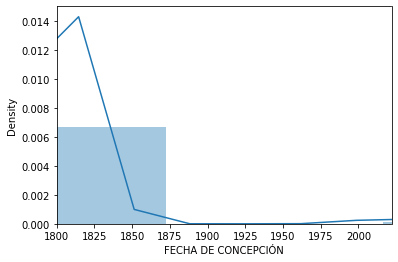

In [32]:
#Creamos un histograma para ver la densidad de los datos correspondientes a la variable y mediante un zoom quitamos el sesgo que peuda haber respecto el minimo y el maximo en los años que nos importa
histograma = sns.distplot(data3['FECHA DE CONCEPCIÓN']);
histograma.set_xlim([1800,2022])


In [45]:
muestra1 = data3.copy()
muestra1.groupby("FECHA DE CONCEPCIÓN").count()

,CÓDIGO ISAPRE,FECHA INFORMACIÓN,RUN TRABAJADOR,FECHA EMISIÓN LICENCIA,NÚMERO DE DÍAS,FECHA INICIO REPOSO,EDAD TRABAJADOR,SEXO TRABAJADOR,TIPO DE LICENCIA SEGÚN CONTRALORÍA,NÚMERO DE DÍAS AUTORIZADOS,DIAGNÓSTICO PRINCIPAL,TIPO DE RESOLUCIÓN,PERIODO,REPOSO AUTORIZADO,DERECHO A SUBSIDIO,FECHA RECEPCIÓN ISAPRE,FECHA RESOLUCIÓN ISAPRE,FECHA RECEPCIÓN EMPLEADOR,REGIÓN,CALIDAD TRABAJADOR,ENTIDAD PAGADORA,NÚMERO DÍAS A PAGAR,MONTO SUBSIDIO LÍQUIDO,MONTO APORTE PREVISIONAL ISAPRE,FECHA DE INICIO DE PAGO,MONTO APORTE PREVISIONAL DE PENSIONES,LUGAR DE REPOSO,CAUSA RECHAZO O MODIFICACIÓN,NÚMERO DE DÍAS PREVIOS AUTORIZADOS,FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL,FECHA CONTRATO DE TRABAJO,MONTO BASE CÁLCULO SUBSIDIOS
FECHA DE CONCEPCIÓN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,886,886,886,886,886,886,886,886,886,886,613,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886
1800,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,70496,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,71657,71656
2020,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2021,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1445,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617
2022,26,26,26,26,26,26,26,26,26,26,24,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
4202,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5202,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6202,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7202,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1




---


Mediante lo anterior podemos abrir las siguientes preguntas las cuales al no contar con mayor informacion esperamos transmitirlas a quien lea este reporte



1.   Existen Registros que por esperanza de vida son imposibles de registrarse en el semestre recientemente transcurrido del año 2022 , si consideramos que la mujer mas longeva de nuestro pais tiene 109 años, lo que situaria al registro mas antiguo posible de existencia al 1912
2.   Existen Registros que ya suscitado lo anterior o no , son tambien considerados no posibles de registrar al ahondar en la historia de licencias medicas y encontrar el registro de que a partir de 1984 se comenzaron a registrar las entregas de las primeras en nuestro pais
Entonces... ¿Podriamos declarar con certeza que estos datos son no fiables? , ¿Existe una intencion particular de registrar estas entradas con estos datos? , ¿sera una digitacion de dato no especificado por default bajo este parametro? 

para intentar resolver algunas de estas interrogantes daremos paso a la concatenacion con otras variables , dando paso al analisis multivariable.


---

## Relacion con otras variables numericas

Al no existir variables numeras que puedan ser contrastadas con la actual , tomaremos FECHA PRIMERA AFILIACION ENTIDAD PREVISIONAL y FECHA DE CONTRATO DE TRABAJO , para transformarlas a tipo flotante y ocupar funciones de grafico de dispersion para comparar


In [41]:
#creamos nueva muestra de datos para operar de aqui en adelante
data4=data3.copy() 
#creamos una lista vacia para hacer operaciones tipo burbuja y no alterar el orden ya previsto del dataset
empty_list = []
#recorremos con un ciclo for y ocupamos el t  del periodo trimestral para obtener el año de afiliacion a entidad previsional
for i in data4["FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL"]:
      resultado = str(i).split(sep= 't')
      empty_list.append(resultado[0])
#posterior a completar el proceso anterior guardamos los datos en nuestra columna correspondiente sin alteraciones y cambiamos su tipo de dato de objeto a float
data4["FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL"] = empty_list
data4["FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL"] = data4["FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL"].astype('float')

In [42]:
#mostramos la columna para mostrar los cambios ya aplicados y el tipo de dato actual
data4["FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL"]

0        2019.0
1        2013.0
2        2017.0
3        2020.0
4        2013.0
          ...  
74187    2018.0
74188    2021.0
74189    2021.0
74190    2021.0
74191    2020.0
Name: FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL, Length: 74192, dtype: float64

In [43]:
#hacemos lo mismo para FECHA DE CONTRATO DE TRABAJO
#creamos una lista vacia para hacer operaciones tipo burbuja y no alterar el orden ya previsto del dataset
empty_list = []
#recorremos con un ciclo for y ocupamos el t  del periodo trimestral para obtener el año de contrato de trabajo
for i in data4["FECHA CONTRATO DE TRABAJO"]:
      resultado = str(i).split(sep= 't')
      empty_list.append(resultado[0])
#posterior a completar el proceso anterior guardamos los datos en nuestra columna correspondiente sin alteraciones y cambiamos su tipo de dato de objeto a float
data4["FECHA CONTRATO DE TRABAJO"] = empty_list
data4["FECHA CONTRATO DE TRABAJO"] = data4["FECHA CONTRATO DE TRABAJO"].astype('float')


In [44]:
data4["FECHA CONTRATO DE TRABAJO"]

0        2019.0
1        2013.0
2        2017.0
3        2020.0
4        2013.0
          ...  
74187    2018.0
74188    2021.0
74189    2021.0
74190    2021.0
74191      20.0
Name: FECHA CONTRATO DE TRABAJO, Length: 74192, dtype: float64

Una vez realizado lo anterior podemos comparar ambas variables en un grafico de dispersion y asi entregar distintas asunciones respecto a la antiguedad laboral , primer trabajo , etc.

(1800.0, 2022.0, 1900.0, 2022.0)

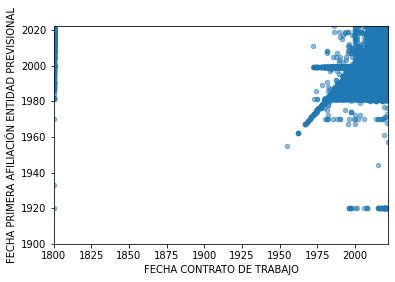

In [52]:
var = 'FECHA CONTRATO DE TRABAJO'
grafico1 = pd.concat([data4['FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL'], data4[var]], axis=1)
grafico1.plot.scatter(x=var, y='FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL', alpha = 0.5);
plt.axis([1800,2022,1900,2022])


Habiendo realizado lo anterior y para dar un termino al trabajo se analizara la data faltante y se estimara que hacer con ella con el fin de reducir mas nuestro dataframe ya que citando el kaggle para apoyo de marco teorico citamos:

*Antes de tratar los datos faltantes, es importante determinar su prevalencia y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra. También hay que asegurarse que la gestión de los datos desaparecidos no esté sesgada o esconda una verdad incómoda.*

In [55]:
# Missing data:

total = data4.isnull().sum().sort_values(ascending = False)
percent = (data4.isnull().sum() / data4.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
DIAGNÓSTICO PRINCIPAL,1613,0.021741
MONTO BASE CÁLCULO SUBSIDIOS,1,0.000013
FECHA DE INICIO DE PAGO,0,0.000000
CALIDAD TRABAJADOR,0,0.000000
ENTIDAD PAGADORA,0,0.000000
NÚMERO DÍAS A PAGAR,0,0.000000
MONTO SUBSIDIO LÍQUIDO,0,0.000000
MONTO APORTE PREVISIONAL ISAPRE,0,0.000000
FECHA DE CONCEPCIÓN,0,0.000000
FECHA RECEPCIÓN EMPLEADOR,0,0.000000


In [56]:
data4

,CÓDIGO ISAPRE,FECHA INFORMACIÓN,RUN TRABAJADOR,FECHA EMISIÓN LICENCIA,NÚMERO DE DÍAS,FECHA INICIO REPOSO,EDAD TRABAJADOR,SEXO TRABAJADOR,TIPO DE LICENCIA SEGÚN CONTRALORÍA,NÚMERO DE DÍAS AUTORIZADOS,DIAGNÓSTICO PRINCIPAL,TIPO DE RESOLUCIÓN,PERIODO,REPOSO AUTORIZADO,DERECHO A SUBSIDIO,FECHA RECEPCIÓN ISAPRE,FECHA RESOLUCIÓN ISAPRE,FECHA RECEPCIÓN EMPLEADOR,REGIÓN,CALIDAD TRABAJADOR,ENTIDAD PAGADORA,NÚMERO DÍAS A PAGAR,MONTO SUBSIDIO LÍQUIDO,MONTO APORTE PREVISIONAL ISAPRE,FECHA DE INICIO DE PAGO,FECHA DE CONCEPCIÓN,MONTO APORTE PREVISIONAL DE PENSIONES,LUGAR DE REPOSO,CAUSA RECHAZO O MODIFICACIÓN,NÚMERO DE DÍAS PREVIOS AUTORIZADOS,FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL,FECHA CONTRATO DE TRABAJO,MONTO BASE CÁLCULO SUBSIDIOS
0,107,2022t2,47878798,2022t2,84,2022t2,26-30,Femenino,Licencia Maternal,84,NaN,Autoricese,Continuacion,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,84,2406186,467710,2022t2,2021,249791,Su Domicilio,Z. Sin Clasificar,187,2019.0,2019.0,859352.0
1,67,2022t2,3078522,2022t2,7,2022t2,36-40,Femenino,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,7,200239,34619,2022t2,1800,43103,Su Domicilio,Z. Sin Clasificar,0,2013.0,2013.0,858167.0
2,107,2022t2,40458254,2022t2,7,2022t2,31-35,Masculino,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,7,145716,16878,1800t1,1800,27583,Su Domicilio,Z. Sin Clasificar,0,2017.0,2017.0,1092870.0
3,107,2022t2,2979082,2022t1,5,2022t1,41-45,Femenino,Enf. o Acc. no del Trabajo,5,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t1,13,Trab. Dep. Sector Privado,Isapre,5,82889,14820,2022t2,1800,17391,Su Domicilio,Z. Sin Clasificar,0,2020.0,2020.0,1243330.0
4,107,2022t2,2081595,2022t2,15,2022t2,31-35,Femenino,Enf. o Acc. no del Trabajo,15,F00-F99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,15,375447,82552,1800t1,1800,63917,Su Domicilio,Z. Sin Clasificar,0,2013.0,2013.0,750894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74187,107,2022t2,5887482,2022t2,11,2022t2,36-40,Masculino,Enf. o Acc. no del Trabajo,11,K00-K93,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,11,756410,83164,1800t1,1800,102841,Su Domicilio,Z. Sin Clasificar,0,2018.0,2018.0,2062937.0
74188,107,2022t2,3092371,2022t2,30,2022t2,31-35,Masculino,Enf. o Acc. no del Trabajo,0,M00-M99,Rechacese,Continuacion,Reposo Total,Sin Derecho,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,0,0,0,1800t1,1800,0,Z. Sin Clasificar,Reposo Injustificado,180,2021.0,2021.0,0.0
74189,107,2022t2,3092371,2022t2,30,2022t2,31-35,Masculino,Enf. o Acc. no del Trabajo,15,M00-M99,Reducese,Continuacion,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,15,353381,59060,2022t2,1800,56740,Z. Sin Clasificar,Reposo Injustificado,150,2021.0,2021.0,706762.0
74190,107,2022t2,3092371,2022t2,30,2022t2,31-35,Masculino,Enf. o Acc. no del Trabajo,0,M00-M99,Rechacese,Continuacion,Reposo Total,Sin Derecho,2022t2,2022t2,2022t2,3,Trab. Dep. Sector Privado,Isapre,0,0,0,1800t1,1800,0,Su Domicilio,Reposo Injustificado,120,2021.0,2021.0,0.0


Si bien la tabla final aun puede ser mejorada y optimizada en muchos aspectos , al haber demostrado que podemos identificar , seleccionar , modificar , eliminar , concatenar y aplicar metodos nativos de analisis matematico en este documento esque daremos por culminada la investigacion

agradecemos el acercamiento academico al analisis dentro de la minera de datos , es una arista que personalmente como estudiante jamas habia visto (Kevin) , creo que con este proyecto he descubierto una rama que me llama bastante la atencion como futuro profesional y creo personalmente que si el dataframe hubiese sido de alguna disciplina o hobbie me hubiese dilatado mucho mas en su operacion.
Como sugerencia nos dejaria proponer que para casos futuros se nos permita elegir un dataset para manejar informacion en la que este se envuelva con mayor claridad y poder tener un campo de imaginacion y trabajo mayor respecto al df